In [46]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [105]:
image_dir = r'/home/master/Documents/tl'
# Initialize list to store processed images
processed_images = []

# Define valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp')

for root, dirs, files in os.walk(image_dir):
    files.sort()
    for file in files:
        
        if file.lower().endswith(valid_extensions):  # Check file extensions
            image_path = os.path.join(root, file)
            print(image_path)
            # Read the image using OpenCV
            img = tf.io.read_file(image_path)
            img = tf.image.decode_jpeg(img, channels=3)
            greyscale_image = tf.image.rgb_to_grayscale(img)
            img_resized = tf.image.resize(greyscale_image, [32, 32])
            if img is not None:
                # Convert to PIL Image for resizing
                #pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                #resized_image = image.resize((28, 28))  # Resize to 28x28 pixels
                
                # Convert the resized image back to a numpy array
                image_array = np.array(img_resized)
                
                # Optionally convert to grayscale if needed
                # image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
                
                # Normalize pixel values between 0 and 1
                image_array = image_array / 255.0
                
                # Append to processed images list
                processed_images.append(image_array)
            else:
                print(f"Failed to read {file}")
              

/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0001.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0002.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0003.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0004.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0005.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0006.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0007.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0008.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0009.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0010.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0011.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0012.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0013.png
/home/master/Documents/tl/200-20240922T103319Z-001/200/200_1_0014.png
/home/master/Documen

In [111]:
size=np.array(processed_images).shape
print(size)

(6006, 32, 32, 1)


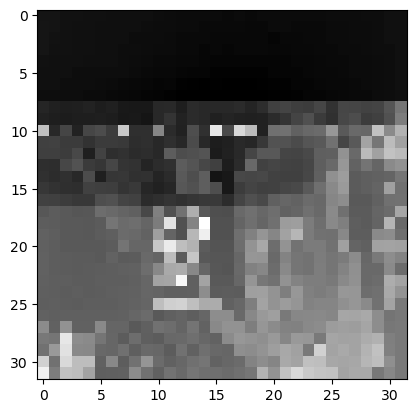

In [210]:
plt.imshow(processed_images[0],cmap=plt.cm.binary)

In [177]:
labels=['200','100','50','20','10','5']
label_array=[]
for indx,i in enumerate([1002,1001,1002,1001,1000,1000]):
    label_array+=[int(indx) for j in range(i)]
        
      

In [178]:
label_array[990:1003]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [179]:
print([labels[i] for i in label_array[990:1003]])

['200', '200', '200', '200', '200', '200', '200', '200', '200', '200', '200', '200', '100']


In [129]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(6)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [131]:
history=model.fit(np.array(processed_images),np.array(label_array),epochs=20,verbose=1)

Epoch 1/20
188/188 [==============================] - 1s 8ms/step - loss: 1.5613 - accuracy: 0.3986
Epoch 2/20
188/188 [==============================] - 1s 7ms/step - loss: 1.3274 - accuracy: 0.4637
Epoch 3/20
188/188 [==============================] - 2s 10ms/step - loss: 1.2400 - accuracy: 0.5133
Epoch 4/20
188/188 [==============================] - 2s 9ms/step - loss: 1.1692 - accuracy: 0.5475
Epoch 5/20
188/188 [==============================] - 1s 8ms/step - loss: 1.0955 - accuracy: 0.5921
Epoch 6/20
188/188 [==============================] - 1s 7ms/step - loss: 1.0611 - accuracy: 0.6019
Epoch 7/20
188/188 [==============================] - 1s 7ms/step - loss: 0.9956 - accuracy: 0.6364
Epoch 8/20
188/188 [==============================] - 1s 7ms/step - loss: 0.9648 - accuracy: 0.6555
Epoch 9/20
188/188 [==============================] - 2s 10ms/step - loss: 0.9113 - accuracy: 0.6727
Epoch 10/20
188/188 [==============================] - 2s 8ms/step - loss: 0.8848 - accuracy: 0.67

In [135]:
model2=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [136]:
prediction=model2.predict(np.array(processed_images))

188/188 [==============================] - 1s 5ms/step


In [146]:
prediction.shape

(6006, 6)

In [159]:
predicted_labels=[i.argmax() for i in prediction]

In [163]:
label_array[990:1010]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [162]:
predicted_labels[990:1010]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 5, 1, 1, 1]

In [208]:
loss=model.evaluate(np.array(processed_images),np.array(label_array))

188/188 [==============================] - 2s 13ms/step - loss: 0.6063 - accuracy: 0.8025


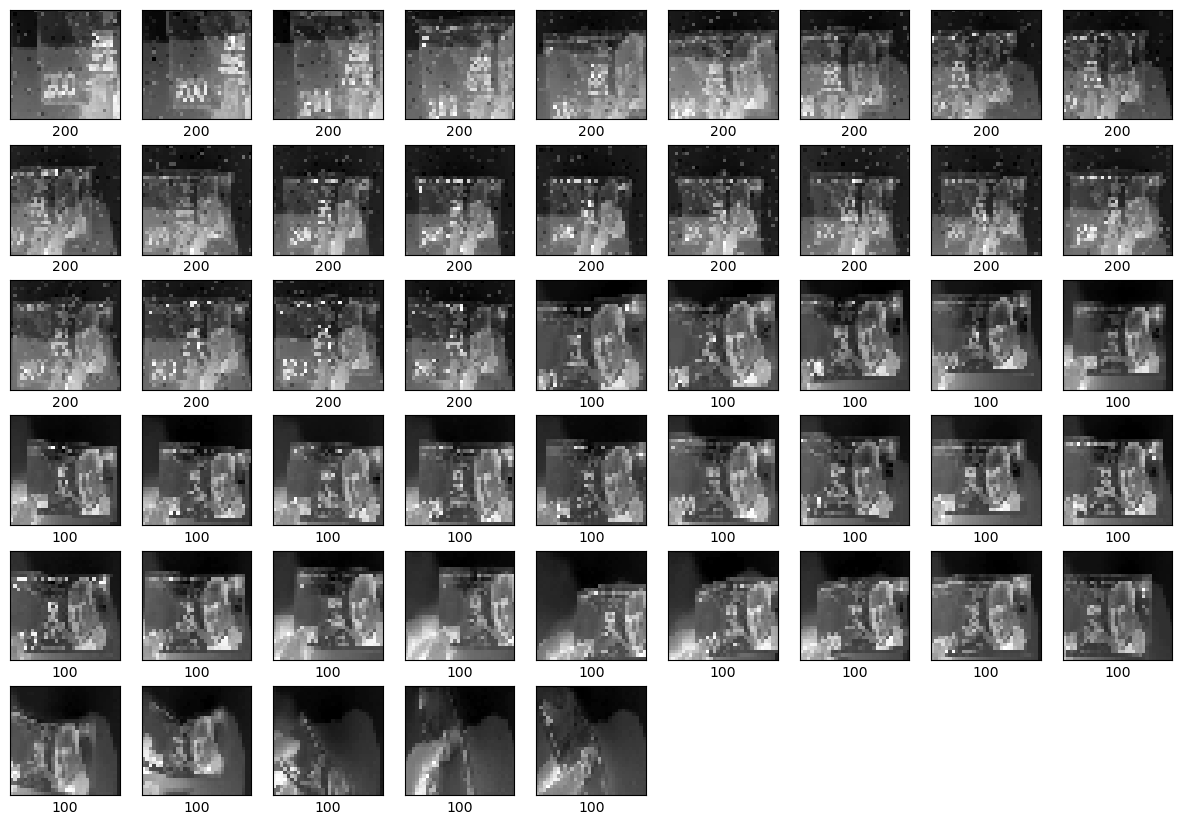

In [226]:
plt.figure(figsize=(15,12))
for i in range(980,1030):
    plt.subplot(7,9,i-980+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(processed_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[label_array[i]])
plt.show()

dataset çok büyük olmadığı için teste bölmedim onun yerine accuracy hesapladım 